In [5]:
import sys
sys.path.append('../..')

In [11]:
import matplotlib.pyplot as plt
import numpy as np

hydrophobicities = np.load('ligand_buriedness.npy')
hydrophobicities[0][0]

1.434337559843957

In [14]:
buriedness_list = [buriedness[0] for buriedness in hydrophobicities]

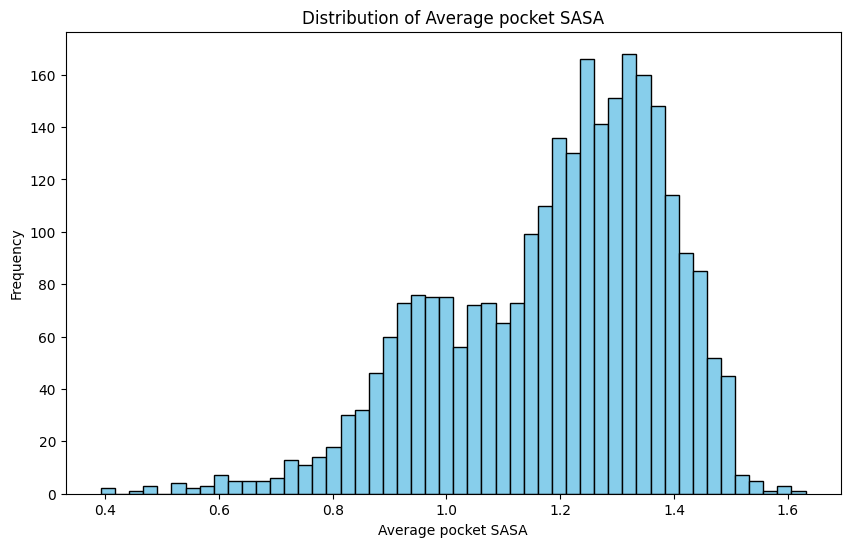

1.3215900871257231


In [37]:
plt.figure(figsize=(10, 6))
counts, bins, _ = plt.hist(buriedness_list, bins=50, color='skyblue', edgecolor='black')
peak_index = np.argmax(counts)
peak_x = (bins[peak_index] + bins[peak_index + 1]) / 2
plt.title('Distribution of Average pocket SASA')
plt.xlabel('Average pocket SASA')
plt.ylabel('Frequency')
plt.show()
print(peak_x)

In [36]:
counts, bins

(array([ 1.,  1.,  0.,  0.,  1.,  0.,  1.,  2.,  0.,  0.,  2.,  2.,  2.,
         0.,  1.,  2.,  2.,  5.,  1.,  4.,  1.,  4.,  1.,  4.,  3.,  3.,
         8.,  5.,  2.,  9., 10.,  4.,  6., 12., 13., 17., 12., 20., 15.,
        31., 34., 26., 33., 40., 33., 43., 41., 34., 42., 33., 26., 30.,
        38., 34., 37., 36., 25., 40., 37., 36., 43., 56., 56., 54., 68.,
        68., 72., 58., 83., 83., 67., 74., 59., 92., 95., 73., 81., 79.,
        72., 76., 61., 53., 53., 39., 44., 41., 27., 25., 30., 15.,  4.,
         3.,  3.,  2.,  1.,  0.,  3.,  0.,  0.,  1.]),
 array([0.39282179, 0.40520537, 0.41758895, 0.42997252, 0.4423561 ,
        0.45473968, 0.46712326, 0.47950683, 0.49189041, 0.50427399,
        0.51665757, 0.52904114, 0.54142472, 0.5538083 , 0.56619187,
        0.57857545, 0.59095903, 0.60334261, 0.61572618, 0.62810976,
        0.64049334, 0.65287691, 0.66526049, 0.67764407, 0.69002765,
        0.70241122, 0.7147948 , 0.72717838, 0.73956196, 0.75194553,
        0.76432911, 0.7767

In [16]:
from lib.pdb import get_all_pdb_names

In [17]:
hydrophobic = []
hydrophilic = []
neutral = []

for pdb_name, hydrophobicity in zip(get_all_pdb_names(), buriedness_list):
    if hydrophobicity > 1:
        hydrophobic.append(pdb_name)
    else:
        hydrophilic.append(pdb_name)

In [18]:
len(hydrophilic) ,len(hydrophobic), len(neutral)

(533, 2186, 0)

In [19]:
with open('../../../data/pdb_group/buriedness_high_pdb', mode='w') as f:
    for pdb in hydrophobic:
        f.write(pdb + '\n')

In [20]:
with open('../../../data/pdb_group/buriedness_low_pdb', mode='w') as f:
    for pdb in hydrophilic:
        f.write(pdb + '\n')

In [93]:
with open('../../data/neutral_500_pdb', mode='w') as f:
    for pdb in neutral:
        f.write(pdb + '\n')

In [21]:
with open('../../../data/train_list', mode='r') as f:
    train_pdb_list = f.read().splitlines()
with open('../../../data/val_list', mode='r') as f:
    val_pdb_list = f.read().splitlines()
train_pdb_set = set(train_pdb_list)
val_pdb_set = set(val_pdb_list)

In [22]:
hydrophobic_set = set(hydrophobic)
hydrophilic_set = set(hydrophilic)
# neutral_set = set(neutral)

In [23]:
test_hydrophobic = list(((train_pdb_set | val_pdb_set) & hydrophobic_set))
test_hydrophilic = list(((train_pdb_set | val_pdb_set) & hydrophilic_set))
# test_neutral = list(((train_pdb_set | val_pdb_set) & neutral_set))

In [25]:
with open('../../../data/train_buriedness_high_pdb', mode='w') as f:
    for pdb in test_hydrophobic:
        f.write(pdb + '\n')

In [24]:
with open('../../../data/train_buriedness_low_pdb', mode='w') as f:
    for pdb in test_hydrophilic:
        f.write(pdb + '\n')

In [98]:
with open('../../data/test_neutral_500_pdb', mode='w') as f:
    for pdb in test_neutral:
        f.write(pdb + '\n')